# Kaggledan dataset toping(missing qiymatlari va turli xil turdagi data typelari bo’lsin) va Klib  orqali Klibsiz model yarating ikkala natijalarni solishtiring jadval orqali(tabulate)


In [37]:
import pandas as pd
df = pd.read_csv(r'D:\2025 lessons\AI+ML course amaliyot\Datasets\penguins.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# With KLIB

In [38]:
import klib

GridSpec(6, 6)

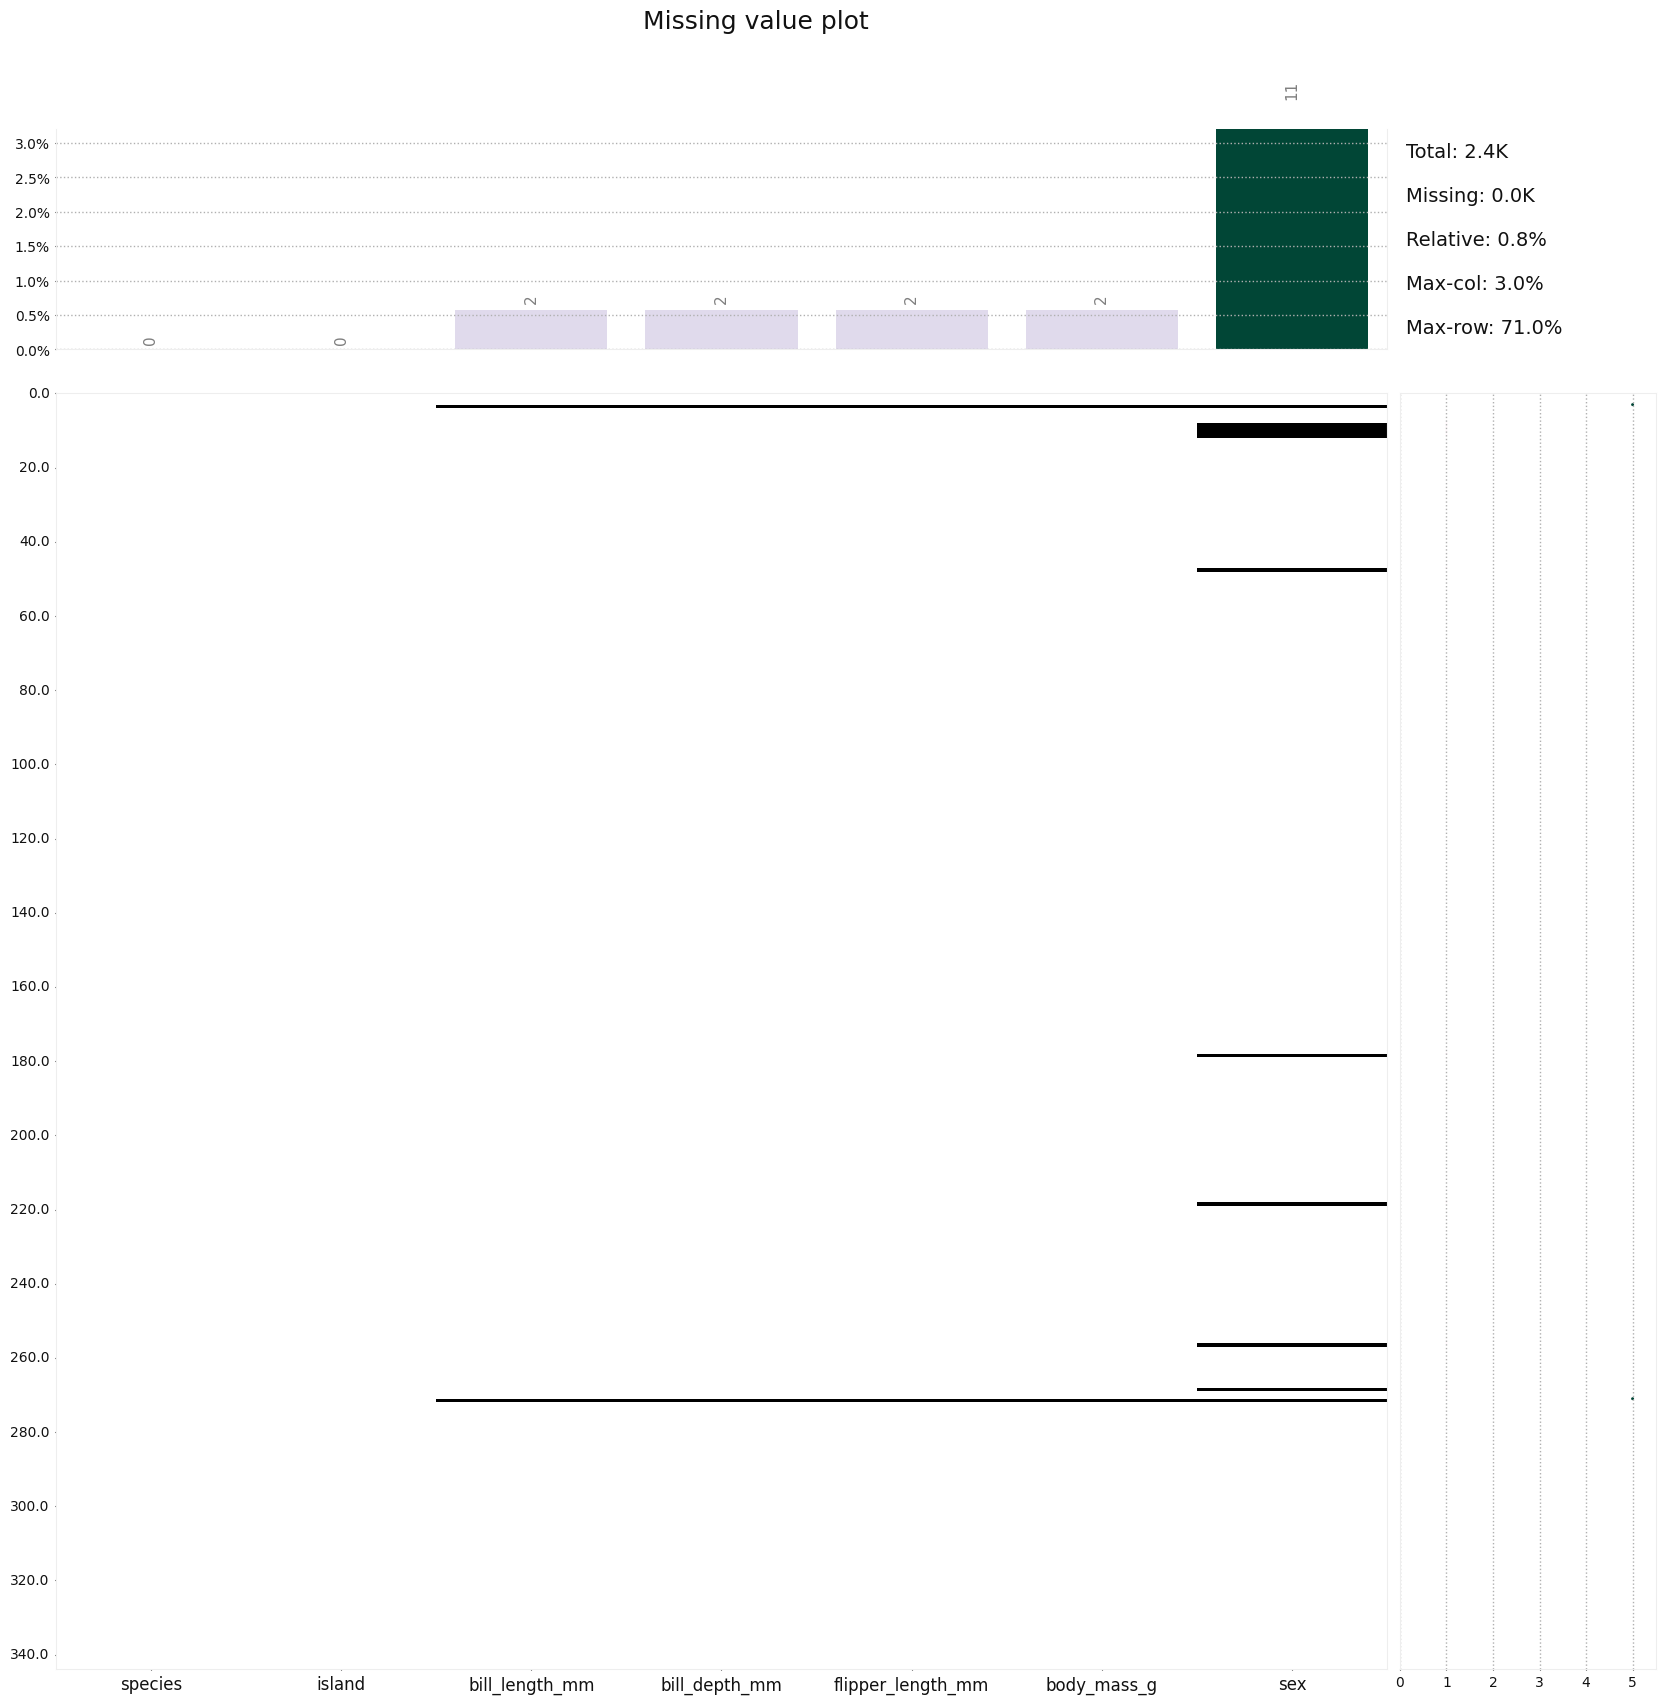

In [39]:
klib.missingval_plot(df) # * missing value larni kurish

In [40]:
df_klib= klib.data_cleaning(df)


Shape of cleaned data: (344, 7) - Remaining NAs: 19


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-50.0%)



In [41]:
df_klib = df_klib.dropna()

In [42]:
df_klib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float32 
 3   bill_depth_mm      333 non-null    float32 
 4   flipper_length_mm  333 non-null    float32 
 5   body_mass_g        333 non-null    float32 
 6   sex                333 non-null    category
dtypes: category(3), float32(4)
memory usage: 9.2 KB


# Encoding

In [52]:
df_klib['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [51]:
df_klib['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [ ]:
df_klib['sex'].value_counts()



CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder
               
for i in  df_klib.columns.to_list() :
  if df_klib[i].dtypes == 'category':
    df_klib[i] = LabelEncoder().fit_transform(df_klib[i])

df_klib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float32
 3   bill_depth_mm      333 non-null    float32
 4   flipper_length_mm  333 non-null    float32
 5   body_mass_g        333 non-null    float32
 6   sex                333 non-null    int64  
dtypes: float32(4), int64(3)
memory usage: 15.6 KB


# Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
df_klib = StandardScaler().fit_transform(df_klib)
df_klib = pd.DataFrame(df_klib)
df_klib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       333 non-null    float64
 1   1       333 non-null    float64
 2   2       333 non-null    float64
 3   3       333 non-null    float64
 4   4       333 non-null    float64
 5   5       333 non-null    float64
 6   6       333 non-null    float64
dtypes: float64(7)
memory usage: 18.3 KB


# Train-Validation-Test Split


In [ ]:
from sklearn.linear_model import LinearRegression